In [48]:
import json
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

all_listings = json.loads(pathlib.Path('./all_listings.json').read_text())
df = pd.DataFrame(all_listings)
df.date_listed = pd.to_datetime(df.date_listed)

In [49]:
CENTRAL_BUREAU_OF_STATISTICS_EXCEL_URL = 'https://www.cbs.gov.il/he/publications/LochutTlushim/2020/%D7%90%D7%95%D7%9B%D7%9C%D7%95%D7%A1%D7%99%D7%99%D7%942020.xlsx'
city_names_and_populations = pd.read_excel(CENTRAL_BUREAU_OF_STATISTICS_EXCEL_URL,
                                           usecols='C,L,M', keep_default_na=False, skipfooter=7, header=7, sheet_name=0)
# city_names_and_populations.to_csv('./city_names_and_populations.csv', index=False)

In [50]:
%pwd

'/Users/dan/projects/real_estate_alert'

In [77]:

city_names_and_populations = city_names_and_populations.set_axis(['hebrew_city', 'city_population', 'english_city'], axis=1)
# city_names_and_populations.city_population = city_names_and_populations.city_population.astype(int)
city_names_and_populations
city_names_and_populations = city_names_and_populations.drop_duplicates(subset='english_city')[['english_city', 'hebrew_city', 'city_population']].reset_index(drop=True)
city_names_and_populations


,english_city,hebrew_city,city_population
0,7989,Abu Ghosh,אבו גוש
1,14783,Abu Sinan,אבו סנאן
2,2261,Abu Qureinat,אבו קורינאת (יישוב)
3,2568,Abu Tulul,אבו תלול
4,2928,Ibtin,אבטין
...,...,...,...
273,477098,Tel Aviv - Yafo,תל אביב יפו
274,14694,Tel Mond,תל מונד
275,23016,Tel Sheva,תל שבע
276,2231,Tifrah,תפרח


In [86]:
df = pd.read_csv('./all_listings.csv', parse_dates=['date_listed'])
# display(df[df.for_sale])
df = df[df.for_sale].describe()
# df = df.round({'area': 0, 'price': 0, 'city_population': 0, 'floor': 1, 'rooms': 1})
# df['date_listed'] = df['date_listed'].apply(
#     lambda x: x.strftime('%B %e, %Y') if isinstance(x, pd.Timestamp) else x)
df


,date_listed,neighborhood,street,coordinates,floor,rooms,area,price,for_sale,hebrew_city,city_population,english_city
0,2023-06-03 09:35:07,מרכז דרום,הרצל,"{'latitude': 32.179816, 'longitude': 34.868616}",0,5,320,5400000,True,רעננה,81383,Ra'annana
1,2023-06-22 13:54:49,קרית נורדאו,נורדאו,"{'latitude': 32.285752, 'longitude': 34.857742}",3,4,92,2060000,True,נתניה,235790,Netanya
2,2023-04-26 08:35:22,נאות שקד,לוי אשכול,"{'latitude': 32.29791, 'longitude': 34.84797}",7,4,83,1930000,True,נתניה,235790,Netanya
3,2023-05-15 09:49:42,צפון מערב מרכז העיר,הרב קוק,"{'latitude': 32.33253, 'longitude': 34.854692}",1,4,100,2000000,True,נתניה,235790,Netanya
4,2023-06-18 16:42:07,בנה ביתך,החסידה,"{'latitude': 32.268245, 'longitude': 34.917387}",0,7,250,5250000,True,קדימה צורן,23325,Qadima- Zoran
...,...,...,...,...,...,...,...,...,...,...,...,...
19038,2023-05-08 23:47:01,"לב מוצקין, בנה ביתך",שדרות בן גוריון,"{'latitude': 32.8388925, 'longitude': 35.08169...",4,4,114,1420000,True,קרית מוצקין,48578,Qiryat Motzkin
19039,2023-05-04 12:34:36,קרית שמואל,הצנחנים,"{'latitude': 32.7937430526316, 'longitude': 35...",1,6,140,1500000,True,טבריה,49234,Tiberias
19040,2023-03-24 09:07:06,רמות יצחק,הערבה,"{'latitude': 32.7698079411765, 'longitude': 35...",0,5,214,2200000,True,נשר,23895,Nesher
19041,2023-04-18 19:05:01,קרית שפרינצק,דרך צרפת,"{'latitude': 32.8210227923077, 'longitude': 34...",0,4,82,1630000,True,חיפה,293198,Haifa


,date_listed,floor,rooms,area,price,city_population
count,19043,19043.000000,19043.000000,19043.000000,1.904300e+04,19043.000000
mean,2023-05-10 23:41:09.066428928,3.469464,4.227800,140.768051,2.947904e+06,225244.214882
min,2023-03-05 15:46:36,-5.000000,0.000000,63.000000,3.000000e+05,2049.000000
25%,2023-04-19 12:50:07,1.000000,3.000000,90.000000,1.830000e+06,62087.000000
50%,2023-05-16 10:53:52,2.000000,4.000000,114.000000,2.570000e+06,158505.000000
75%,2023-06-05 18:07:22,4.000000,5.000000,145.000000,3.550000e+06,261945.000000
max,2023-06-25 12:27:23,111.000000,12.000000,1250.000000,1.200000e+07,985124.000000
std,NaN,4.292142,1.189082,97.578647,1.685680e+06,240501.369296


In [61]:
df = df[df.for_sale]
cities_df = df.english_city.value_counts()
cities_df.name = 'amount_of_listings'
cities_df = cities_df.to_frame().merge(city_names_and_populations,
                                       left_index=True,
                                       right_on='english_city')
cities_df = cities_df.set_index('english_city')
cities_df['amount_of_listings_per_100k_residents'] = (
    (cities_df.amount_of_listings / cities_df.city_population) * 100000).astype(int)
median_amount_of_listings_per_100k_residents = \
    cities_df.amount_of_listings_per_100k_residents.median()

cities_df = cities_df.sort_index()
plot = cities_df.amount_of_listings.plot.bar(width=0.3, position=0)
cities_df.amount_of_listings_per_100k_residents.plot.bar(width=0.3, color='orange', position=1)
plot.legend(loc='upper right')
plot.set_xlabel(None)
plot.axhline(y=median_amount_of_listings_per_100k_residents, color='orange', linestyle='--')
plot.get_figure().set_size_inches(min(30, max(8, int(cities_df.shape[0] / 2))), 5)
plot.set_title('Amount of Listings')
st.pyplot(plot.get_figure(), True)


0       2023-06-03 09:35:07
1       2023-06-22 13:54:49
2       2023-04-26 08:35:22
3       2023-05-15 09:49:42
4       2023-06-18 16:42:07
                ...        
38108   2023-05-16 19:08:12
38109   2023-05-16 17:49:09
38110   2023-05-16 17:24:31
38111   2023-04-30 21:27:43
38112   2023-03-30 17:54:33
Name: date_listed, Length: 38113, dtype: datetime64[ns]

In [52]:
# fix specific cities to match
TYPOS = {
    'תל אביב -יפו': 'תל אביב יפו',
    'הרצלייה': 'הרצליה',
    'קדימה-צורן': 'קדימה צורן',
    'מודיעין-מכבים-רעות*': 'מודיעין מכבים רעות',
    'קריית אונו': 'קרית אונו',
    'יהוד-מונוסון': 'יהוד מונוסון',
    'קריית גת': 'קרית גת',
    'קריית מלאכי': 'קרית מלאכי',
    'קריית עקרון': 'קרית עקרון',
    'גבע בנימין': 'אדם - גבע בנימין',
    'בית אריה-עופרים': 'בית אריה / עופרים',
    'נהרייה': 'נהריה',
    'קריית מוצקין': 'קרית מוצקין',
    'קריית אתא': 'קרית אתא',
    'קריית ביאליק': 'קרית ביאליק',
    'קריית ים': 'קרית ים',
    'פרדס חנה-כרכור': 'פרדס חנה כרכור',
    'נוף הגליל': 'נצרת עילית / נוף הגליל',
    'קריית שמונה': 'קרית שמונה',
    'מעלות-תרשיחא': 'מעלות תרשיחא',
    'קריית טבעון': 'קרית טבעון',
    'בנימינה-גבעת עדה*': 'בנימינה גבעת עדה',
    'מיתר': 'מיתר / כרמית',
    'כוכב יאיר': 'כוכב יאיר / צור יגאל',
    'סביון*': 'סביון',
    'פרדסייה': 'פרדסיה',
    'שער שומרון': 'שערי תקווה',
    'קריית ארבע': 'קרית ארבע',
    'בית יצחק-שער חפר': 'בית יצחק שער חפר',
}

city_names_and_populations = city_names_and_populations.replace(TYPOS)

In [53]:
city_names_and_populations

,hebrew_city,city_population,english_city
0,אבו גוש,7989,Abu Ghosh
1,אבו סנאן,14783,Abu Sinan
2,אבו קורינאת (יישוב),2261,Abu Qureinat
3,אבו תלול,2568,Abu Tulul
4,אבטין,2928,Ibtin
...,...,...,...
277,תל אביב יפו,477098,Tel Aviv - Yafo
278,תל מונד,14694,Tel Mond
279,תל שבע,23016,Tel Sheva
280,תפרח,2231,Tifrah


In [54]:
df

,date_listed,city,neighborhood,street,coordinates,floor,rooms,area,price,for_sale
0,2023-06-03 09:35:07,רעננה,מרכז דרום,הרצל,"{'latitude': 32.179816, 'longitude': 34.868616}",0,5,320,5400000,True
1,2023-06-08 10:55:52,רמת השרון,אלון,None,"{'latitude': 32.147393, 'longitude': 34.84411}",5,3,82,2900000,True
2,2022-07-11 16:39:01,אבן יהודה,שאר העיר,None,"{'latitude': 32.268055, 'longitude': 34.880077}",0,8,279,6149000,True
3,2023-06-22 13:54:49,נתניה,קרית נורדאו,נורדאו,"{'latitude': 32.285752, 'longitude': 34.857742}",3,4,92,2060000,True
4,2023-04-26 08:35:22,נתניה,נאות שקד,לוי אשכול,"{'latitude': 32.29791, 'longitude': 34.84797}",7,4,83,1930000,True
...,...,...,...,...,...,...,...,...,...,...
95331,2023-05-16 13:24:52,חיפה,גאולה,חרמון,"{'latitude': 32.802997, 'longitude': 35.002219}",2,2,60,2000,False
95332,2023-03-30 17:54:33,עכו,"אברהם דנינו, בן גוריון","רמח""ל","{'latitude': 32.92733, 'longitude': 35.094892}",1,4,112,4000,False
95333,2023-04-13 07:49:30,בית הלל,בית הלל,חניון קייקי בית הלל,"{'latitude': 33.198311, 'longitude': 35.610664}",1,1,40,1900,False
95334,2023-05-16 09:12:09,קדיתא,None,קדיתא,None,0,1,140,2500,False


In [55]:
df = df.merge(city_names_and_populations, left_on='city', right_on='hebrew_city', how='left')
# df = df.drop('city', axis=1)
# from what I saw about 1% of listings are in cities with a population of less than 2000,
# for simplicity we'll ignore them
df = df.dropna()
df.city_population = df.city_population.astype(int)
df

,date_listed,city,neighborhood,street,coordinates,floor,rooms,area,price,for_sale,hebrew_city,city_population,english_city
0,2023-06-03 09:35:07,רעננה,מרכז דרום,הרצל,"{'latitude': 32.179816, 'longitude': 34.868616}",0,5,320,5400000,True,רעננה,81383,Ra'annana
3,2023-06-22 13:54:49,נתניה,קרית נורדאו,נורדאו,"{'latitude': 32.285752, 'longitude': 34.857742}",3,4,92,2060000,True,נתניה,235790,Netanya
4,2023-04-26 08:35:22,נתניה,נאות שקד,לוי אשכול,"{'latitude': 32.29791, 'longitude': 34.84797}",7,4,83,1930000,True,נתניה,235790,Netanya
5,2023-05-15 09:49:42,נתניה,צפון מערב מרכז העיר,הרב קוק,"{'latitude': 32.33253, 'longitude': 34.854692}",1,4,100,2000000,True,נתניה,235790,Netanya
6,2023-06-18 16:42:07,קדימה צורן,בנה ביתך,החסידה,"{'latitude': 32.268245, 'longitude': 34.917387}",0,7,250,5250000,True,קדימה צורן,23325,Qadima- Zoran
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95329,2023-05-04 17:04:29,שלומי,שלומית,דרור,"{'latitude': 33.078572, 'longitude': 35.151695}",0,2,30,2400,False,שלומי,7555,Shelomi
95330,2023-05-16 15:22:19,זרזיר,זרזיר,אלסנדיאן,"{'latitude': 32.714873, 'longitude': 35.222694}",1,3,100,2000,False,זרזיר,8604,Zarzir
95331,2023-05-16 13:24:52,חיפה,גאולה,חרמון,"{'latitude': 32.802997, 'longitude': 35.002219}",2,2,60,2000,False,חיפה,293198,Haifa
95332,2023-03-30 17:54:33,עכו,"אברהם דנינו, בן גוריון","רמח""ל","{'latitude': 32.92733, 'longitude': 35.094892}",1,4,112,4000,False,עכו,51964,Akko


In [56]:
x = df[df.english_city.isnull()].city.value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(x[x>5])

Series([], Name: count, dtype: int64)


In [29]:
# CITIES_BLACKLIST = {'רמלה', 'לוד', 'אלעד', 'נתניה', 'כפר יונה', 'צור יצחק', 'גדרה', 'קרית עקרון', 'אשדוד', 'אשקלון', 'קרית גת', 'קרית מלאכי',
#                     'שדרות', 'בני עי"ש', 'ביתר עילית', 'אדם - גבע בנימין', 'עמנואל', 'גבעת זאב', 'עלי', 'קרני שומרון', 'אפרת', 'אבני חפץ', 'מודיעין עילית'}
CITIES_BLACKLIST = set()
MIN_AMOUNT_OF_LISTINGS_IN_CITY = 9

# drop erroneos extreme rows to clean data set
df = df[(df.area < df.area.mean() * 5) & (df.area > df.area.mean() / 10)]
df = df[df.date_listed > (pd.Timestamp.today() - pd.Timedelta(16, unit='W'))]
listing_count_by_city = df.hebrew_city.value_counts()
# print(listing_count_by_city)
cities_to_ignore = CITIES_BLACKLIST | \
    set(listing_count_by_city.loc[lambda listing_count: listing_count < MIN_AMOUNT_OF_LISTINGS_IN_CITY].index)
df = df[~df.hebrew_city.isin(cities_to_ignore)]
df = df.reset_index(drop=True)
display(df)
df.describe()

,date_listed,city,neighborhood,street,coordinates,floor,rooms,area,price,for_sale,hebrew_city,city_population,english_city
0,2023-06-03 09:35:07,רעננה,מרכז דרום,הרצל,"{'latitude': 32.179816, 'longitude': 34.868616}",0,5,320,5400000,True,רעננה,81383,Ra'annana
1,2023-06-22 13:54:49,נתניה,קרית נורדאו,נורדאו,"{'latitude': 32.285752, 'longitude': 34.857742}",3,4,92,2060000,True,נתניה,235790,Netanya
2,2023-04-26 08:35:22,נתניה,נאות שקד,לוי אשכול,"{'latitude': 32.29791, 'longitude': 34.84797}",7,4,83,1930000,True,נתניה,235790,Netanya
3,2023-05-15 09:49:42,נתניה,צפון מערב מרכז העיר,הרב קוק,"{'latitude': 32.33253, 'longitude': 34.854692}",1,4,100,2000000,True,נתניה,235790,Netanya
4,2023-06-18 16:42:07,קדימה צורן,בנה ביתך,החסידה,"{'latitude': 32.268245, 'longitude': 34.917387}",0,7,250,5250000,True,קדימה צורן,23325,Qadima- Zoran
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40980,2023-05-16 17:49:09,עכו,הכרם ג',דרך השלום,"{'latitude': 32.937648, 'longitude': 35.083901}",5,4,120,4300,False,עכו,51964,Akko
40981,2023-05-16 17:24:31,נהריה,אכזיב,אלמוג,"{'latitude': 33.037745, 'longitude': 35.10268}",8,5,240,7000,False,נהריה,65019,Nahariyya
40982,2023-04-30 21:27:43,קרית מוצקין,אביבים,קדיש לוז,"{'latitude': 32.849503, 'longitude': 35.092256}",1,3,72,3100,False,קרית מוצקין,48578,Qiryat Motzkin
40983,2023-05-16 13:24:52,חיפה,גאולה,חרמון,"{'latitude': 32.802997, 'longitude': 35.002219}",2,2,60,2000,False,חיפה,293198,Haifa


,date_listed,floor,rooms,area,price,city_population
count,40985,40985.000000,40985.000000,40985.000000,4.098500e+04,40985.000000
mean,2023-05-20 06:13:50.487495424,3.495498,3.917653,127.151202,1.421029e+06,224194.416128
min,2023-03-05 14:30:44,-5.000000,0.000000,51.000000,1.000000e+03,2049.000000
25%,2023-05-03 09:45:54,1.000000,3.000000,80.000000,5.200000e+03,62087.000000
50%,2023-05-28 19:28:57,2.000000,4.000000,105.000000,1.500000e+04,158505.000000
75%,2023-06-12 17:10:02,4.000000,5.000000,135.000000,2.495000e+06,261945.000000
max,2023-06-25 12:27:23,111.000000,12.000000,2500.000000,1.200000e+07,985124.000000
std,NaN,4.455610,1.189996,91.272740,1.858658e+06,234045.922840


In [30]:
df[df.for_sale == False]
_, area_bins1 = pd.qcut(df[df.english_city == 'Netanya'].area, 10, retbins=True)
_, area_bins2 = pd.qcut(df[df.english_city == 'Petah Tiqwa'].area, 10, retbins=True)
display(area_bins1)
display(area_bins2)

array([  51.,   72.,   90.,  100.,  110.,  120.,  128.,  136.,  148.,
        190., 1080.])

array([  52.,   70.,   79.,   88.,   96.,  100.,  110.,  120.,  135.,
        169., 1060.])

In [31]:
CITIES = {
    'מרכז': {
        'Tel Aviv - Yafo', 'Petah Tiqwa', 'Giv\'atayim', 'Be\'er Ya\'aqov', 'Qiryat Ono', 'Ramla',
        'Bene Beraq', 'Rosh HaAyin', 'El\'ad', 'Or Yehuda', 'Ganne Tiqwa', 'Bat Yam', 'Lod',
        'Ramat Gan', 'Modi\'in-Makkabbim-Re\'ut', 'Rishon LeZiyyon', 'Giv\'at Shemu\'el',
        'Yehud-Monoson', 'Holon', 'Azor', 'Bet Dagan', 'Ramat HaSharon', 'Shoham'
    },
    'שרון': {
        'Ra\'annana', 'Qadima- Zoran', 'Herzliyya', 'Hod HaSharon', 'Tel Mond', 'Kefar Sava',
        'Kefar Yona', 'Netanya', 'Even Yehuda', 'Bat Hefer', 'Bet Yizhaq-Sh. Hefer', 'Elyakhin',
        'Kokhav Ya\'ir', 'Mattan', 'Pardesiyya'
    },
    'יהודה ושומרון ובקעת הירדן': {
        'Alfe Menashe', 'Ari\'el', 'Giv\'at Ze\'ev', 'Immanu\'el', 'Eli', 'Qarne Shomeron',
        'Zur Yizhaq', 'Betar Illit', 'Avne Hefez', 'Geva Binyamin', 'Efrat', 'Modi\'in Illit',
        'Ale Zahav', 'Bet Arye-Ofarim', 'Bet El', 'Ganne Modi\'in', 'Har Adar', 'Kefar Adummim',
        'Kokhav Ya\'aqov', 'Na\'ale', 'Allon Shevut', 'Barqan', 'Brukhin', 'El\'azar', 'Elon More',
        'Elqana', 'Mizpe Yeriho', 'Nili', 'Noqedim', 'Ofra', 'Oranit', 'Qedumim', 'Qiryat Arba',
        'Revava', 'Sha\'ar Shomron', 'Talmon'
    },
    'חדרה, זכרון והעמקים': {
        'Ramat Yishay', 'Afula', 'Yoqne\'am Illit', 'Rekhasim', 'Bet She\'an',
        'Binyamina-Giv\'at Ada', 'Pardes Hanna-Karkur', 'Qiryat Tiv\'on', 'Zikhron Ya\'aqov',
        'Hadera', 'Or Aqiva', 'Harish', 'Qesaryya', 'Atlit', 'Isifya', 'Ahuzzat Baraq', 'Qazir'
    },
    'מחוז ירושלים': {
        'Zur Hadassa', 'Bet Shemesh', 'Ma\'ale Adummim', 'Mevasseret Ziyyon', 'Jerusalem',
        'Abu Ghosh'
    },
    'שפלה ומישור החוף הדרומי': {
        'Qiryat Gat', 'Ashdod', 'Sederot', 'Rehovot', 'Qiryat Mal\'akhi', 'Qiryat Eqron',
        'Bene Ayish', 'Gedera', 'Yavne', 'Ashqelon', 'Nes Ziyyona', 'Gan Yavne', 'Mazkeret Batya',
        'Be\'er Gannim', 'Merkaz Shappira', 'Shetulim', 'Yad Binyamin'
    },
    'דרום': {
        'Dimona', 'Elat', 'Metar', 'Be\'er Sheva', 'Lehavim', 'Yeroham', 'Ofaqim', 'Mizpe Ramon',
        'Arad', 'Netivot', 'Omer'
    },
    'צפון': {
        'Qiryat Bialik', 'Tiberias', 'Qiryat Yam', 'Nesher', 'Migdal', 'Akko', 'Shelomi', 'Qazrin',
        'Zefat', 'Migdal HaEmeq', 'Ma\'alot-Tarshiha', 'Karmi\'el', 'Qiryat Atta', 'Qiryat Shemona',
        'Tirat Karmel', 'Haifa', 'Yavne\'el', 'Nahariyya', 'Nof HaGalil', 'Qiryat Motzkin',
        'Hazor HaGelilit', 'Kefar Weradim', 'Nazareth', 'Kefar Tavor', 'Nofit', 'Rosh Pinna'
    }
}


In [32]:
set(df.english_city.unique()) - {city for area in CITIES for city in CITIES[area]}

set()

english_city         area_bin         price                         
                                                mean               count     
for_sale                                       False          True False True
0         Petah Tiqwa   (51.999, 70.0]   4046.068627  1.750328e+06   102   67
1         Petah Tiqwa     (70.0, 79.0]   4639.285714  1.963067e+06    42   58
2         Petah Tiqwa     (79.0, 88.0]   4904.807692  2.089759e+06    52   87
3         Petah Tiqwa     (88.0, 96.0]   5561.666667  2.266895e+06    60   76
4         Petah Tiqwa    (96.0, 100.0]   5479.090909  2.456475e+06    55   80
5         Petah Tiqwa   (100.0, 110.0]   6290.000000  2.656150e+06    40   85
6         Petah Tiqwa   (110.0, 120.0]   6451.195122  2.927583e+06    41   93
7         Petah Tiqwa   (120.0, 135.0]   7387.500000  3.130744e+06    60   82
8         Petah Tiqwa   (135.0, 169.0]   8009.963636  3.795175e+06    55   63
9         Petah Tiqwa  (169.0, 1060.0]   8546.981132  4.783162e+06    53   80
10         Qiryat Ono   (54.999, 77.5]   4254.545455  2.625714e+06    22    7
11         Qiryat Ono     (77.5, 92.0]   5745.789474  2.652000e+06    19   10
12         Qiryat Ono    (92.0, 105.0]   6437.500000  2.957000e+06    20   10
13         Qiryat Ono   (105.0, 115.0]   5907.142857  3.271750e+06    14   20
14         Qiryat Ono   (115.0, 120.0]   6983.333333  3.363889e+06    15    9
15         Qiryat Ono   (120.0, 128.0]   7415.789474  3.542000e+06    19   10
16         Qiryat Ono   (128.0, 135.0]   7510.000000  3.354286e+06    20    7
17         Qiryat Ono   (135.0, 145.0]   7854.545455  4.067500e+06    22   10
18         Qiryat Ono   (145.0, 170.0]   8116.666667  4.525000e+06    18    6
19         Qiryat Ono   (170.0, 720.0]  11228.571429  6.125000e+06    14   14

Text(0.5, 1.0, 'Annual Yield From Rent')

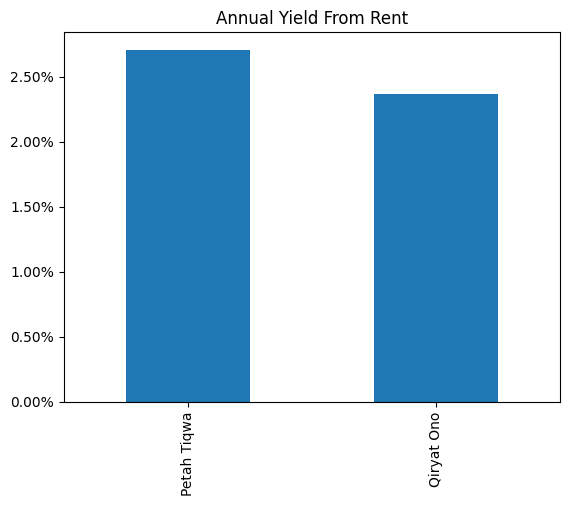

In [33]:
import matplotlib.ticker as mtick
import numpy as np
df1 = df[df.english_city.isin(['Petah Tiqwa', 'Qiryat Ono'])]
MIN_IN_EACH_BIN = 3
MAX_AMOUNT_OF_BINS = 10
dfs = list()
for city in df1.english_city.unique():
    x = df[df.english_city == city]
    number_of_bins = min(MAX_AMOUNT_OF_BINS, int(x.shape[0] / MIN_IN_EACH_BIN))
    dfs.append(x.assign(area_bin=pd.qcut(x.area, number_of_bins, duplicates='drop')))
    
x = pd.concat(dfs).groupby(['english_city', 'area_bin', 'for_sale'])\
    .agg({'price': ['mean', 'count']}).unstack().reset_index()
display(x)
res =  x.groupby('english_city').apply(
    lambda x: np.average(x['price']['mean'][False] * 12 / x['price']['mean'][True],
                         weights=x['price']['count'][False] + x['price']['count'][True]))
plot = res.plot.bar()
plot.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plot.set_xlabel(None)
plot.set_title('Annual Yield From Rent')
# x = x.group

Text(0.5, 1.0, 'Distribution of the Area of Listings')

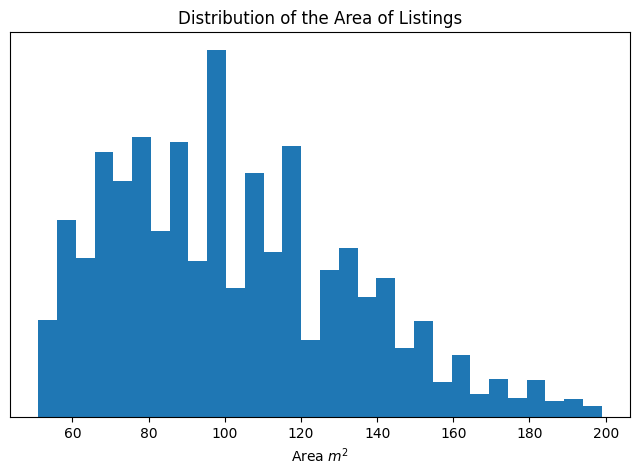

In [34]:
plot = df[df.area < 200].area.hist(bins=30, figsize=(8, 5), grid=False)
plot.get_yaxis().set_visible(False)
plot.set_xlabel('Area $m^2$')
plot.set_title('Distribution of the Area of Listings')

Text(0.5, 1.0, 'Distribution of Prices')

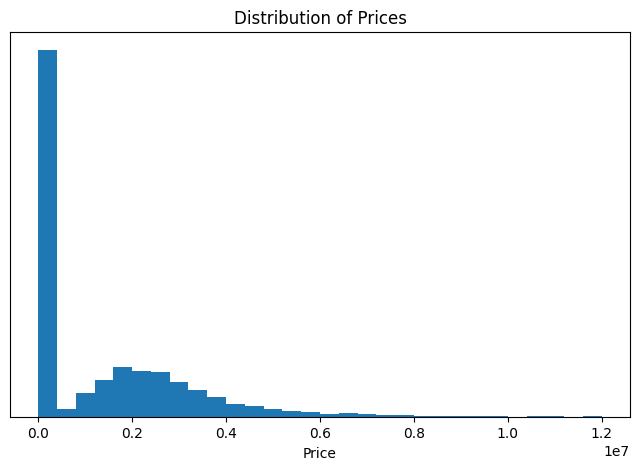

In [35]:
plot = df.price.hist(bins=30, figsize=(8, 5), grid=False)
plot.get_yaxis().set_visible(False)
plot.set_xlabel('Price')
plot.set_title('Distribution of Prices')

Text(0.5, 1.0, 'Distribution of Dates Listed')

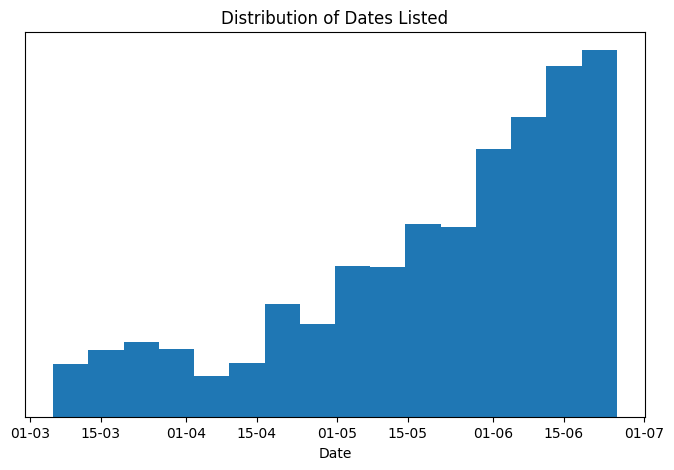

In [36]:
import matplotlib

plot = df.date_listed.hist(bins=16, figsize=(8, 5), grid=False)
plot.get_yaxis().set_visible(False)
plot.set_xlabel('Date')
plot.get_xaxis().set_major_formatter(matplotlib.dates.DateFormatter('%d-%m'))
plot.set_title('Distribution of Dates Listed')

Text(0.5, 1.0, 'Day of the Week Listed')

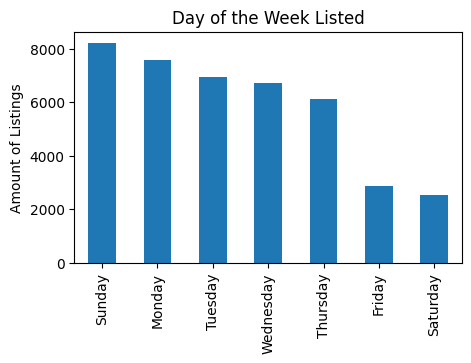

In [37]:
import calendar

WEEKDAYS = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plot = pd.Series([calendar.day_name[date.weekday()] for date in df.date_listed]).value_counts().\
    sort_index(key=lambda day_names: [WEEKDAYS.index(day_name) for day_name in day_names]).plot.bar(figsize=(5,3))
plot.set_ylabel('Amount of Listings')
plot.set_title('Day of the Week Listed')

Text(0.5, 1.0, 'Distribution of Number of Rooms')

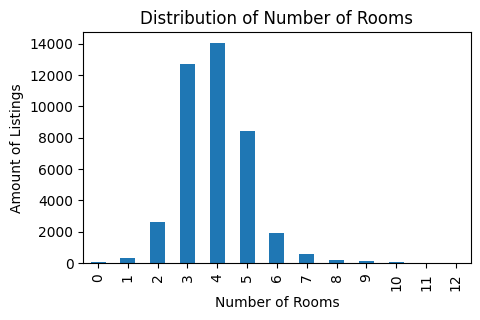

In [38]:
plot = df.rooms.value_counts().sort_index().plot.bar(figsize=(5,3))
plot.set_xlabel('Number of Rooms')
plot.set_ylabel('Amount of Listings')
plot.set_title('Distribution of Number of Rooms')

Text(0.5, 1.0, 'Time of Day Listings Were Posted')

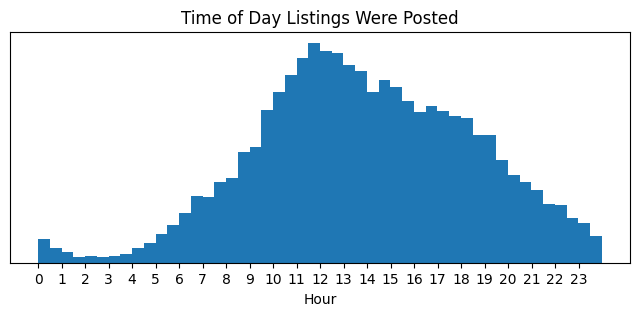

In [39]:
plot = pd.Series([date_listed.time().hour + date_listed.time().minute / 60 for date_listed in df.date_listed])\
    .hist(bins=48, figsize=(8, 3), grid=False)
plot.get_yaxis().set_visible(False)
plot.get_xaxis().set_ticks([i for i in range(0, 24, 1)])
plot.set_xlabel('Hour')
plot.set_title('Time of Day Listings Were Posted')

Text(0.5, 1.0, 'Distribution of Floor Number')

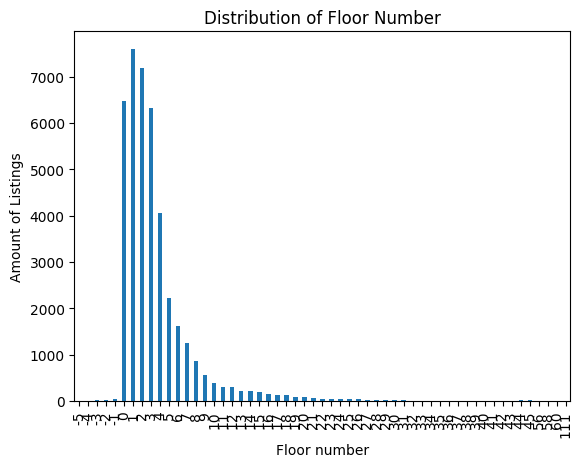

In [40]:
plot = df.floor.value_counts().sort_index().plot.bar()
plot.set_xlabel('Floor number')
plot.set_ylabel('Amount of Listings')
plot.set_title('Distribution of Floor Number')

Text(0.5, 1.0, 'Amount of Listings, and the Price per Square Meter, for each City')

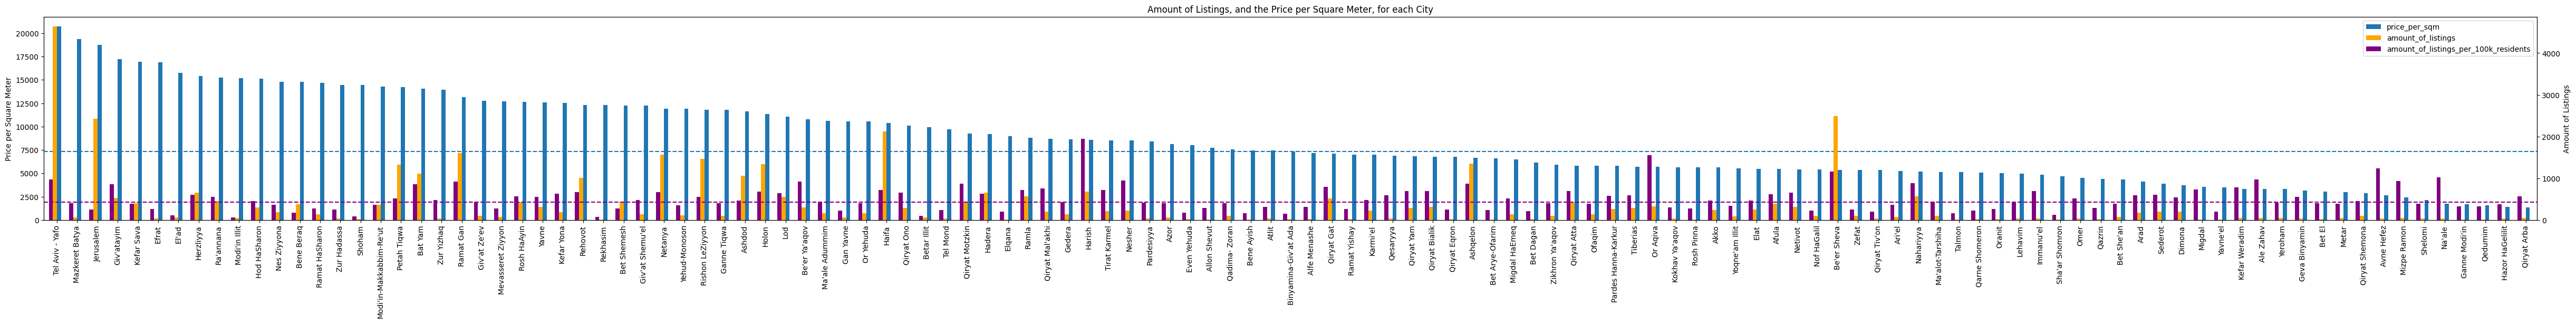

In [41]:
# create df
amount_of_listings = df.english_city.value_counts()
amount_of_listings.name = 'amount_of_listings'
df['price_per_sqm'] = df.price / df.area
prices_per_sqm = df.groupby('english_city').mean(numeric_only=True)['price_per_sqm'].sort_values(ascending=False).astype(int)
df = df.drop('price_per_sqm', axis=1)
cities_df = pd.merge(prices_per_sqm, amount_of_listings, left_index=True, right_index=True)
cities_df = cities_df.merge(city_names_and_populations, left_index=True, right_on='english_city')
cities_df = cities_df.set_index('english_city')
cities_df['amount_of_listings_per_100k_residents'] = ((cities_df.amount_of_listings / cities_df.city_population) * 100000).astype(int)
median_amount_of_listings_per_100k_residents = cities_df.amount_of_listings_per_100k_residents.median()
median_price_per_sqm = cities_df.price_per_sqm.median()

# plotting
fig, ax = plt.subplots()
ax2 = ax.twinx()
cities_df.price_per_sqm.plot.bar(ax=ax, width=0.2, position=0)
cities_df.amount_of_listings.plot.bar(ax=ax2, width=0.2, color='orange', position=1)
cities_df.amount_of_listings_per_100k_residents.plot.bar(ax=ax2, width=0.2, color='purple', position=2)
ax.set_ylabel('Price per Square Meter')
ax2.set_ylabel('Amount of Listings')
ax.set_xlim(right=(ax.get_xlim()[1] + 0.25))
ax2.set_xlim(right=(ax2.get_xlim()[1] + 0.25))
ax.set_xlabel(None)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.axhline(y=median_price_per_sqm, linestyle='--')
ax2.axhline(y=median_amount_of_listings_per_100k_residents, color='purple', linestyle='--')
ax.legend(lines + lines2, labels + labels2, loc='upper right')
fig.set_size_inches(int(cities_df.shape[0] / 2), 5)
ax.set_title('Amount of Listings, and the Price per Square Meter, for each City')

In [47]:
cities_df

,price_per_sqm,amount_of_listings,hebrew_city,city_population,amount_of_listings_per_100k_residents
english_city,,,,,
Tel Aviv - Yafo,20716,4637,תל אביב יפו,477098,971
Mazkeret Batya,19344,64,מזכרת בתיה,15830,404
Jerusalem,18759,2430,ירושלים,985124,246
Giv'atayim,17194,533,גבעתיים,62087,858
Kefar Sava,16925,398,כפר סבא,101972,390
...,...,...,...,...,...
Na'ale,1723,29,נעלה,2853,1016
Ganne Modi'in,1683,9,גני מודיעין,2756,326
Qedumim,1585,15,קדומים,4628,324


In [46]:
df

,date_listed,city,neighborhood,street,coordinates,floor,rooms,area,price,for_sale,hebrew_city,city_population,english_city
0,2023-06-03 09:35:07,רעננה,מרכז דרום,הרצל,"{'latitude': 32.179816, 'longitude': 34.868616}",0,5,320,5400000,True,רעננה,81383,Ra'annana
1,2023-06-22 13:54:49,נתניה,קרית נורדאו,נורדאו,"{'latitude': 32.285752, 'longitude': 34.857742}",3,4,92,2060000,True,נתניה,235790,Netanya
2,2023-04-26 08:35:22,נתניה,נאות שקד,לוי אשכול,"{'latitude': 32.29791, 'longitude': 34.84797}",7,4,83,1930000,True,נתניה,235790,Netanya
3,2023-05-15 09:49:42,נתניה,צפון מערב מרכז העיר,הרב קוק,"{'latitude': 32.33253, 'longitude': 34.854692}",1,4,100,2000000,True,נתניה,235790,Netanya
4,2023-06-18 16:42:07,קדימה צורן,בנה ביתך,החסידה,"{'latitude': 32.268245, 'longitude': 34.917387}",0,7,250,5250000,True,קדימה צורן,23325,Qadima- Zoran
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40980,2023-05-16 17:49:09,עכו,הכרם ג',דרך השלום,"{'latitude': 32.937648, 'longitude': 35.083901}",5,4,120,4300,False,עכו,51964,Akko
40981,2023-05-16 17:24:31,נהריה,אכזיב,אלמוג,"{'latitude': 33.037745, 'longitude': 35.10268}",8,5,240,7000,False,נהריה,65019,Nahariyya
40982,2023-04-30 21:27:43,קרית מוצקין,אביבים,קדיש לוז,"{'latitude': 32.849503, 'longitude': 35.092256}",1,3,72,3100,False,קרית מוצקין,48578,Qiryat Motzkin
40983,2023-05-16 13:24:52,חיפה,גאולה,חרמון,"{'latitude': 32.802997, 'longitude': 35.002219}",2,2,60,2000,False,חיפה,293198,Haifa


In [42]:
# Ideas for graphs:
# stats of the median apartment properties per city per price point for top 5-10 cities
# gather rent listings and match apartemnts with same city & area (in buckets of 10-20) to find price/rent ratios

,date_listed,city,neighborhood,street,coordinates,floor,rooms,area,price,for_sale,hebrew_city,city_population,english_city
0,2023-06-03 09:35:07,רעננה,מרכז דרום,הרצל,"{'latitude': 32.179816, 'longitude': 34.868616}",0,5,320,5400000,True,רעננה,81383,Ra'annana
1,2023-06-22 13:54:49,נתניה,קרית נורדאו,נורדאו,"{'latitude': 32.285752, 'longitude': 34.857742}",3,4,92,2060000,True,נתניה,235790,Netanya
2,2023-04-26 08:35:22,נתניה,נאות שקד,לוי אשכול,"{'latitude': 32.29791, 'longitude': 34.84797}",7,4,83,1930000,True,נתניה,235790,Netanya
3,2023-05-15 09:49:42,נתניה,צפון מערב מרכז העיר,הרב קוק,"{'latitude': 32.33253, 'longitude': 34.854692}",1,4,100,2000000,True,נתניה,235790,Netanya
4,2023-06-18 16:42:07,קדימה צורן,בנה ביתך,החסידה,"{'latitude': 32.268245, 'longitude': 34.917387}",0,7,250,5250000,True,קדימה צורן,23325,Qadima- Zoran
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40980,2023-05-16 17:49:09,עכו,הכרם ג',דרך השלום,"{'latitude': 32.937648, 'longitude': 35.083901}",5,4,120,4300,False,עכו,51964,Akko
40981,2023-05-16 17:24:31,נהריה,אכזיב,אלמוג,"{'latitude': 33.037745, 'longitude': 35.10268}",8,5,240,7000,False,נהריה,65019,Nahariyya
40982,2023-04-30 21:27:43,קרית מוצקין,אביבים,קדיש לוז,"{'latitude': 32.849503, 'longitude': 35.092256}",1,3,72,3100,False,קרית מוצקין,48578,Qiryat Motzkin
40983,2023-05-16 13:24:52,חיפה,גאולה,חרמון,"{'latitude': 32.802997, 'longitude': 35.002219}",2,2,60,2000,False,חיפה,293198,Haifa


array([  51.,   66.,   75.,   85.,   95.,  105.,  116.,  127.,  145.,
        200., 2500.])

array([1.00e+03, 3.50e+03, 4.50e+03, 6.00e+03, 7.80e+03, 1.50e+04,
       1.59e+06, 2.19e+06, 2.80e+06, 3.80e+06, 1.20e+07])

Text(0.5, 1.0, 'Distribution of the Area of Listings')

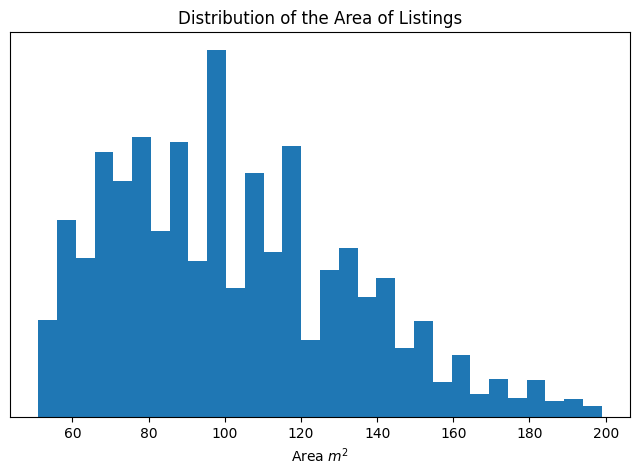

In [43]:
# display(df.neighborhood.value_counts())
display(df)
d1 = df.copy()
# d1.area = [round(area, -1) for area in df.area]
_, area_bins = pd.qcut(df.area, 10, retbins=True)
_, price_bins = pd.qcut(df.price, 10, retbins=True)
display(area_bins, price_bins)

plot = df[df.area < 200].area.hist(bins=30, figsize=(8, 5), grid=False)
plot.get_yaxis().set_visible(False)
plot.set_xlabel('Area $m^2$')
plot.set_title('Distribution of the Area of Listings')

Text(0.5, 1.0, 'Day of the Week Listed')

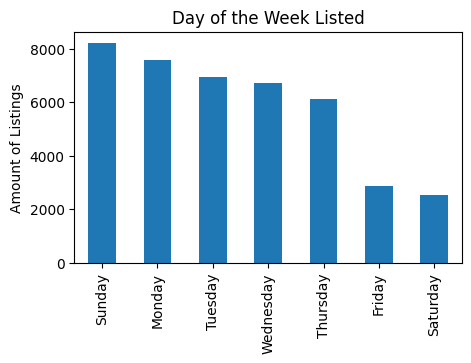

In [44]:
import calendar
WEEKDAYS = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plot = pd.Series([calendar.day_name[date.weekday()] for date in df.date_listed]).value_counts(). \
    sort_index(
    key=lambda day_names: [WEEKDAYS.index(day_name) for day_name in day_names]).plot.bar(
    figsize=(5, 3))
plot.set_ylabel('Amount of Listings')
plot.set_title('Day of the Week Listed')